# Wrangle and Analyze Data


### Table of Contents
- [Introduction](#Introduction)
- [Part I - Gather](#Gather)
- [Part II - Assess](#Assess)
- [Part III - Clean](#Clean)
- [Part IV - Storing, analyzing, and visualizing the wrangled data](#Storing,analyzing,andvisualizingthewrangleddata)

## Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. 

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. WeRateDogs has over 4 million followers and has received international media coverage.

## Part l - Gather
 Gather each of the three pieces of data as described below: 
>
> **The WeRateDogs Twitter archive** Download this file manually by clicking the following link: twitter_archive_enhanced.csv.
>
> **The tweet image predictions** i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.
>
> **Twitter API & JSON** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data that is interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [157]:
#Importing the packages

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import requests
import json
import seaborn as sns
from IPython.display import Image

In [158]:
#Reading the WeRateDogs twitter archive enhanced data

Twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')

In [159]:
#Reading the tweet image predictions data 

URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)

with open(file='image_predictions', mode='wb') as file:
    file.write(response.content)

Image_predictions_data = pd.read_csv('image-predictions.tsv', sep='\t')

**Note**: Twitter's updated process didn't work for me. Therefore, I will be using the 'tweet_json.txt' file that Udacity has provided it for this project.

In [160]:
## Code for twitter API ##

#import tweepy
#from tweepy import OAuthHandler
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

#count = 0
#fails_dict = {}
#start = timer()

# Save each tweet's returned JSON as a new line in a .txt file

#with open('tweet_json.txt', 'w') as outfile:
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
            
#end = timer()
#print(end - start)
#print(fails_dict)
#print(foken, access_secret)
#api = tweep.API(auth)

In [161]:
#Reading the tweet_json.txt file

Tweet_json_data = pd.read_json('tweet-json.txt', orient = 'records', lines =True)

## Part ll - Assess

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues.

### Visual Assessment

In [162]:
Twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [163]:
Image_predictions_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [164]:
Tweet_json_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Programmatic Assessment

### Twitter_archive_data

In [165]:
Twitter_archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [166]:
Twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [167]:
sum(Twitter_archive_data['tweet_id'].duplicated())

0

In [168]:
Twitter_archive_data['retweeted_status_id'].isna().sum()

2175

In [169]:
sum(Twitter_archive_data['expanded_urls'].duplicated())

137

In [170]:
Twitter_archive_data['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Walker       1
light        1
Linus        1
Karll        1
Jonah        1
Name: name, Length: 957, dtype: int64

In [171]:
Twitter_archive_data['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [172]:
Invalid_dog_names = ['None', 'such', 'life', 'by', 'old', 'all', 'o', 'an', 'my','a', 'nan', 'this', 'just', 'very',
                 'not', 'one', 'officially', 'incredibly', 'infuriating', 'unacceptable', 'actually', 'his',
                 'quite', 'space', 'lighr', 'getting', 'the']

### Image_predictions_data

In [173]:
Image_predictions_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [174]:
Image_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [175]:
sum(Image_predictions_data['tweet_id'].duplicated())

0

In [176]:
sum(Image_predictions_data['jpg_url'].duplicated())

66

In [177]:
Image_predictions_data['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Tweet_json_data

In [178]:
Tweet_json_data.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [179]:
Tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [180]:
print(sum(Tweet_json_data['id'].duplicated()))

0


In [181]:
print(Tweet_json_data['retweeted_status'].isna().sum())

2175


### *Quality Issues* 
Issues with content: Completeness, Validity, Accuracy, Consistency.

>**Twitter_archive_data** 
>- Convert the data-type of the 'Timestamp' column to a DateTime type.
>- Some missing values are represented as None instead of NaN, hence they are not counted as missing values.
>- Keep only original tweets, remove retweeted tweets.
>- Drop duplicated rows in the 'expanded_urls' column.
>- The 'name' column has invalid names.
>- Drop Unneeded columns.


>**Image_prediction_data** 
>- Drop duplicated rows in the 'jpg_url' column.
>- Rename the columns img_num, p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog and p3_dog.


>**Tweet_json_data**
>- Rename the 'id' column to 'tweet_id'.
>- Keep only original tweets, remove retweets from the rating.
>- Drop Unneeded columns.

### *Tidness*

Issues with structure: Untidy data.

>- In Twitter_archive_data, the doggo, floofer, pupper and puppo columns will be merged in one column called 'dog_stage'
>- Merge all the dataframes in one dataframe.

## Part lll - Clean

### Twitter_archive_data

In [182]:
Twitter_archive_data_copy = Twitter_archive_data.copy()

#### Define

Convert the data-type of the 'Timestamp' column to a DateTime type.

#### Code

In [183]:
Twitter_archive_data_copy['timestamp'] = pd.to_datetime(Twitter_archive_data_copy['timestamp'])

#### Test

In [184]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define
Some missing values are represented as None instead of NaN, hence they are not counted as missing values.

#### Code

In [185]:
Twitter_archive_data_copy = Twitter_archive_data_copy.replace('None', np.nan)

#### Test

In [186]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define
Keep only original tweets, remove retweeted tweets.

#### Code

In [187]:
Twitter_archive_data_copy = Twitter_archive_data_copy[Twitter_archive_data_copy['retweeted_status_id'].isnull()]

#### Test

In [188]:
Twitter_archive_data_copy['retweeted_status_id'].isna().sum()

2175

#### Define
Drop duplicated rows in the 'expanded_urls' column.

#### Code

In [189]:
Twitter_archive_data_copy = Twitter_archive_data_copy.drop_duplicates(subset=['expanded_urls'], keep='last')

#### Test

In [190]:
sum(Twitter_archive_data_copy['expanded_urls'].duplicated())

0

#### Define
The 'name' column has invalid names.

#### Code

In [191]:
for _ in Invalid_dog_names:     
    Twitter_archive_data_copy['name'].replace(_, np.nan, inplace=True)

#### Test

In [192]:
Twitter_archive_data_copy['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


#### Define
Drop Unneeded columns.

#### Code

In [193]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 
           'retweeted_status_user_id', 'retweeted_status_timestamp']

Twitter_archive_data_copy = Twitter_archive_data_copy.drop(columns, axis=1)

#### Test

In [194]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   text                2117 non-null   object             
 3   expanded_urls       2116 non-null   object             
 4   rating_numerator    2117 non-null   int64              
 5   rating_denominator  2117 non-null   int64              
 6   name                1393 non-null   object             
 7   doggo               84 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              232 non-null    object             
 10  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 198.5+ KB


### Quality Issue: Image Prediction

In [195]:
Image_predictions_data_copy = Image_predictions_data.copy()

#### Define
Drop duplicated rows in the 'jpg_url' column.

#### Code

In [196]:
Image_predictions_data_copy = Image_predictions_data_copy.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [197]:
sum(Image_predictions_data_copy['jpg_url'].duplicated())

0

#### Define
Rename the columns img_num, p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog and p3_dog.

#### Code

In [198]:
Image_predictions_data_copy.rename(columns = {"img_num": "number_of_img", "p1": "1_prediction_algorithem", 
                                              "p2": "2_prediction_algorithem", "p3": "3_prediction_algorithem", 
                                              "p1_conf": "1_prediction_confidence", "p2_conf": "2_prediction_confidence", 
                                              "p3_conf": "3_prediction_confidence", "p1_dog": "1_prediction_dog", 
                                              "p2_dog": "2_prediction_dog", "p3_dog": "3_prediction_dog"}, inplace=True)

#### Test

In [199]:
Image_predictions_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2009 non-null   int64  
 1   jpg_url                  2009 non-null   object 
 2   number_of_img            2009 non-null   int64  
 3   1_prediction_algorithem  2009 non-null   object 
 4   1_prediction_confidence  2009 non-null   float64
 5   1_prediction_dog         2009 non-null   bool   
 6   2_prediction_algorithem  2009 non-null   object 
 7   2_prediction_confidence  2009 non-null   float64
 8   2_prediction_dog         2009 non-null   bool   
 9   3_prediction_algorithem  2009 non-null   object 
 10  3_prediction_confidence  2009 non-null   float64
 11  3_prediction_dog         2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


### Tweet_json_data

In [200]:
Tweet_json_data_copy = Tweet_json_data.copy()

#### Define
Rename the 'id' column to 'tweet_id'.

#### Code

In [201]:
Tweet_json_data_copy.rename(columns = {"id": "tweet_id"}, inplace=True)

#### Test

In [202]:
Tweet_json_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

#### Define
Keep only original tweets, remove retweeted tweets.

#### Code

In [203]:
Tweet_json_data_copy = Tweet_json_data_copy[Tweet_json_data_copy['retweeted_status'].isnull()]

#### Test

In [204]:
Tweet_json_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2175 non-null   datetime64[ns, UTC]
 1   tweet_id                       2175 non-null   int64              
 2   id_str                         2175 non-null   int64              
 3   full_text                      2175 non-null   object             
 4   truncated                      2175 non-null   bool               
 5   display_text_range             2175 non-null   object             
 6   entities                       2175 non-null   object             
 7   extended_entities              1994 non-null   object             
 8   source                         2175 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

#### Define
Drop Unneeded columns.

#### Code

In [205]:
columns = ['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 
           'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 
           'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'possibly_sensitive',
           'possibly_sensitive_appealable', 'entities', 'is_quote_status', 'extended_entities', 'is_quote_status', 
           'id_str', 'truncated', 'favorited', 'retweeted', 'display_text_range'] 

Tweet_json_data_copy = Tweet_json_data_copy.drop(columns, axis=1)

#### Test

In [206]:
Tweet_json_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2175 non-null   datetime64[ns, UTC]
 1   tweet_id        2175 non-null   int64              
 2   full_text       2175 non-null   object             
 3   source          2175 non-null   object             
 4   user            2175 non-null   object             
 5   retweet_count   2175 non-null   int64              
 6   favorite_count  2175 non-null   int64              
 7   lang            2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 152.9+ KB


### Tidiness

Tidy data requirements:
<ol>
<li>Each variable forms a column.</li>
<li>Each observation forms a row.</li>
<li>Each type of observational unit forms a table.</li>
</ol>

#### Define
In Twitter_archive_data, the doggo, floofer, pupper and puppo columns will be merged in one column called 'dog_stage'

#### Code

In [207]:
Twitter_archive_data_copy['dog_stage'] = Twitter_archive_data_copy[['doggo', 'floofer', 'pupper', 'puppo']].fillna('None').sum(axis=1)


In [208]:
Twitter_archive_data_copy['dog_stage'].unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [209]:
Twitter_archive_data_copy.loc[Twitter_archive_data_copy.dog_stage == 'NoneNoneNoneNone', 'dog_stage'] = 'None'
Twitter_archive_data_copy.loc[Twitter_archive_data_copy.dog_stage == 'doggoNoneNoneNone', 'dog_stage'] = 'doggo'
Twitter_archive_data_copy.loc[Twitter_archive_data_copy.dog_stage == 'NoneNoneNonepuppo', 'dog_stage'] = 'puppo'
Twitter_archive_data_copy.loc[Twitter_archive_data_copy.dog_stage == 'NoneNonepupperNone', 'dog_stage'] = 'pupper'
Twitter_archive_data_copy.loc[Twitter_archive_data_copy.dog_stage == 'NoneflooferNoneNone', 'dog_stage'] = 'floofer'
Twitter_archive_data_copy.loc[Twitter_archive_data_copy.dog_stage == 'doggoNoneNonepuppo', 'dog_stage'] = 'doggo, puppo'
Twitter_archive_data_copy.loc[Twitter_archive_data_copy.dog_stage == 'doggoNonepupperNone', 'dog_stage'] = 'doggo, pupper'
Twitter_archive_data_copy.loc[Twitter_archive_data_copy.dog_stage == 'doggoflooferNoneNone', 'dog_stage'] = 'doggo, floofer'

In [210]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']

Twitter_archive_data_copy = Twitter_archive_data_copy.drop(columns, axis=1)

#### Test

In [211]:
Twitter_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   text                2117 non-null   object             
 3   expanded_urls       2116 non-null   object             
 4   rating_numerator    2117 non-null   int64              
 5   rating_denominator  2117 non-null   int64              
 6   name                1393 non-null   object             
 7   dog_stage           2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.9+ KB


#### Define
Merge all the dataframes in one dataframe.

#### Code

In [212]:
Merged_data = pd.merge(Twitter_archive_data_copy, Image_predictions_data_copy, how='inner', on=['tweet_id'])
Merged_data = pd.merge(Merged_data, Tweet_json_data_copy, how='inner', on=['tweet_id'])

#### Test

In [213]:
Merged_data

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,number_of_img,...,3_prediction_algorithem,3_prediction_confidence,3_prediction_dog,created_at,full_text,source,user,retweet_count,favorite_count,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,banana,0.076110,False,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",8853,39467,en
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,papillon,0.068957,True,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",6514,33819,en
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,kelpie,0.031379,True,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",4328,25461,en
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,spatula,0.040836,False,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",8964,42908,en
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",9774,41048,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,Doberman,0.154629,True,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",41,111,en
1924,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,miniature_pinscher,0.222752,True,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",147,311,en
1925,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,bloodhound,0.116197,True,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",47,128,en
1926,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/66602928

In [214]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1928 non-null   int64              
 1   timestamp                1928 non-null   datetime64[ns, UTC]
 2   text                     1928 non-null   object             
 3   expanded_urls            1928 non-null   object             
 4   rating_numerator         1928 non-null   int64              
 5   rating_denominator       1928 non-null   int64              
 6   name                     1304 non-null   object             
 7   dog_stage                1928 non-null   object             
 8   jpg_url                  1928 non-null   object             
 9   number_of_img            1928 non-null   int64              
 10  1_prediction_algorithem  1928 non-null   object             
 11  1_prediction_confidence  1928 

## Storing, analyzing, and visualizing the wrangled data

### Storing
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. 

In [215]:
Merged_data.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

### Analyzing, and visualizing the wrangled data

In [216]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1928 non-null   int64  
 1   timestamp                1928 non-null   object 
 2   text                     1928 non-null   object 
 3   expanded_urls            1928 non-null   object 
 4   rating_numerator         1928 non-null   int64  
 5   rating_denominator       1928 non-null   int64  
 6   name                     1304 non-null   object 
 7   dog_stage                1928 non-null   object 
 8   jpg_url                  1928 non-null   object 
 9   number_of_img            1928 non-null   int64  
 10  1_prediction_algorithem  1928 non-null   object 
 11  1_prediction_confidence  1928 non-null   float64
 12  1_prediction_dog         1928 non-null   bool   
 13  2_prediction_algorithem  1928 non-null   object 
 14  2_prediction_confidence 

In [217]:
df['tweet_id'] = df['tweet_id'].astype('str')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [218]:
df.describe()

,rating_numerator,rating_denominator,number_of_img,1_prediction_confidence,2_prediction_confidence,3_prediction_confidence,retweet_count,favorite_count
count,1928.000000,1928.000000,1928.000000,1928.000000,1.928000e+03,1.928000e+03,1928.000000,1928.000000
mean,12.293568,10.550311,1.201763,0.593835,1.338761e-01,6.008588e-02,2514.632261,8296.298237
std,42.201839,7.444349,0.558240,0.273084,1.006528e-01,5.083543e-02,4187.214895,11371.277140
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,10.000000,1.000000,0.360137,5.378615e-02,1.605498e-02,611.750000,1873.750000
50%,11.000000,10.000000,1.000000,0.587635,1.163795e-01,4.952715e-02,1299.000000,3904.000000
75%,12.000000,10.000000,1.000000,0.848562,1.943738e-01,9.130702e-02,2911.250000,10280.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


### Insights

#### Image Prediction Algorithms

In [219]:
#Counting the True boolean values for the three prediction algorithms to see which algorithm works the best.

print("Total True values of the first Prediction Algorithm:", df['1_prediction_dog'].value_counts()[1])
print("Total True values of the second Prediction Algorithm:", df['2_prediction_dog'].value_counts()[1])
print("Total True values of the third Prediction Algorithm:", df['3_prediction_dog'].value_counts()[1])

Total True values of the first Prediction Algorithm: 1425
Total True values of the second Prediction Algorithm: 1442
Total True values of the third Prediction Algorithm: 1397


#### Five Number Summary for 'retweet_count'

In [220]:
df['retweet_count'].describe()

count     1928.000000
mean      2514.632261
std       4187.214895
min         16.000000
25%        611.750000
50%       1299.000000
75%       2911.250000
max      79515.000000
Name: retweet_count, dtype: float64

#### Five Number Summary for 'favorite_count' 

In [221]:
df['favorite_count'].describe()

count      1928.000000
mean       8296.298237
std       11371.277140
min          81.000000
25%        1873.750000
50%        3904.000000
75%       10280.000000
max      132810.000000
Name: favorite_count, dtype: float64

#### Total Number of Tweets in Years

In [222]:
#Counting the number of tweets for each year to see which year has the most tweets.

years = df['timestamp'].dt.year
tweets = df['tweet_id'].groupby(years).count()

tweets

timestamp
2015    652
2016    930
2017    346
Name: tweet_id, dtype: int64

### Analyze and Visualize

#### The Relation between Retweets and Likes

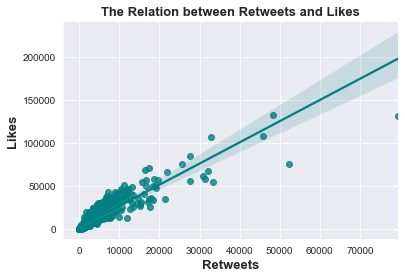

In [227]:
fig, ax = plt.subplots()

ax.set_title("The Relation between Retweets and Likes", fontsize=13, fontweight='bold')

sns.regplot(x=df['retweet_count'], y=df['favorite_count'], color='teal')

ax.set_ylabel('Likes', fontsize=13, fontweight='bold')
ax.set_xlabel('Retweets', fontsize=13, fontweight='bold')

sns.set_style("darkgrid")

#### Total Number of Tweets over Time

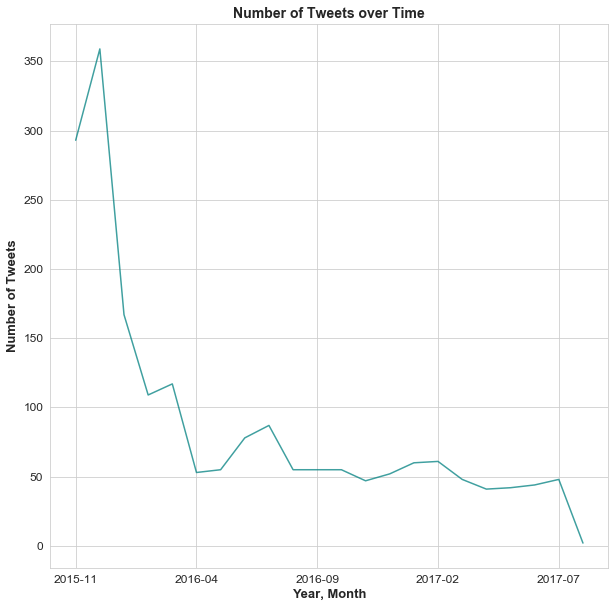

In [225]:
# Visualizing the total number of tweets over time to see if the number of tweets increaseing, or decreasing.

tweets = df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

tweets.plot(ax=ax, x='Year, Month', y='Number of Tweets', kind='line', figsize=(10,10), color='teal', alpha=0.75)

ax.set_title('Number of Tweets over Time', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Tweets', fontsize=13, fontweight='bold')
ax.set_xlabel('Year, Month', fontsize=13, fontweight='bold')

sns.set_style("whitegrid")

#### 10 Most Popular Dog Names

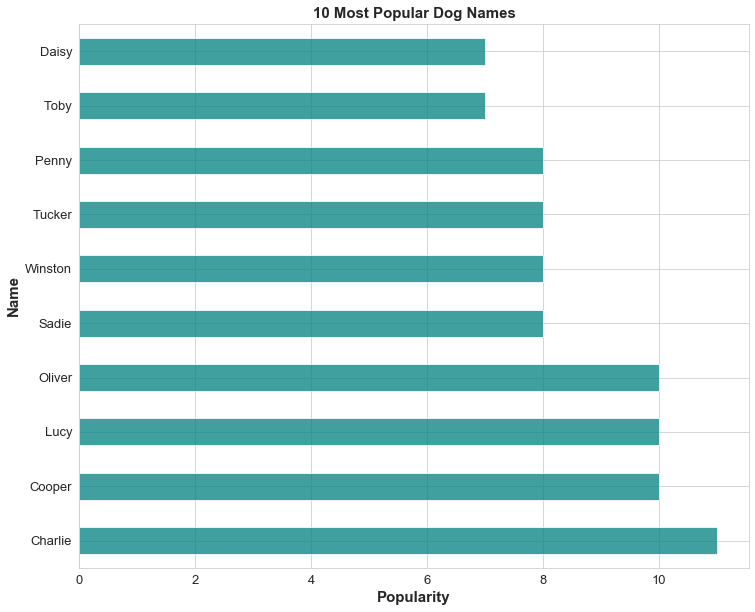

In [229]:
dog_names = df['name'].value_counts()

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

dog_names[:10].plot(ax=ax, x='Name', y='Popularity', kind='barh', figsize=(12,10), color='teal', alpha=0.75)

ax.set_title('10 Most Popular Dog Names', fontsize=15, fontweight='bold')
ax.set_ylabel('Name', fontsize=15, fontweight='bold')
ax.set_xlabel('Popularity', fontsize=15, fontweight='bold')

sns.set_style("whitegrid")

#### Most Liked Picture 

In [230]:
retweets = df.sort_values('favorite_count', ascending=False)

retweets['jpg_url'].iloc[0]

'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg'

In [231]:
Image(url = 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg')

### What a cutie!